## Reproducing GPT-2

Original Weights for GPT-2 are available here https://github.com/openai/gpt-2. This was written in tensorflow.

HuggingFace has a pytorch version at: https://github.com/huggingface/transformers/blob/main/src/transformers/models/gpt2/modeling_gpt2.py. That's the one to use.

User the HuggingFace transformers library for this model.

## Here's the video way to load the transformer

In [1]:
# alternative way to load the model - per the video
from transformers import GPT2LMHeadModel
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

# print out the shapes of the tensors in the model
for k, v in model_hf.state_dict().items():
    print(k, v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [2]:
# look at the positional embeddings
sd_hf["transformer.wpe.weight"].view(-1)[:10] # -1 flattens the tensor

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565])

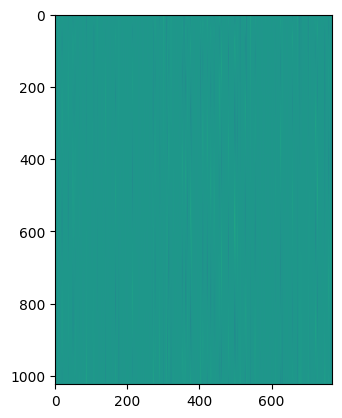

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# This is shoing for each position (y-axis) the value of the embedding for each token (x-axis)
plt.imshow(sd_hf["transformer.wpe.weight"], cmap="viridis")

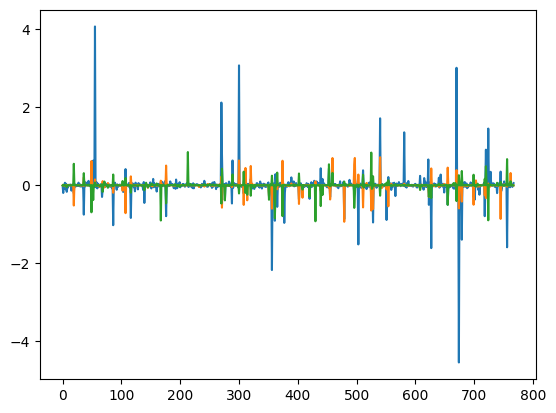

In [4]:
# to get an individual position's embedding, we would have to pick out rows
row1 = sd_hf["transformer.wpe.weight"][0]
row2 = sd_hf["transformer.wpe.weight"][100]
row3 = sd_hf["transformer.wpe.weight"][800]


plt.plot(row1, label="Position 1")
plt.plot(row2, label="Position 2")
plt.plot(row3, label="Position 3")

tensor([-0.0464,  0.0233, -0.0045,  ...,  0.0289,  0.0217,  0.0008])


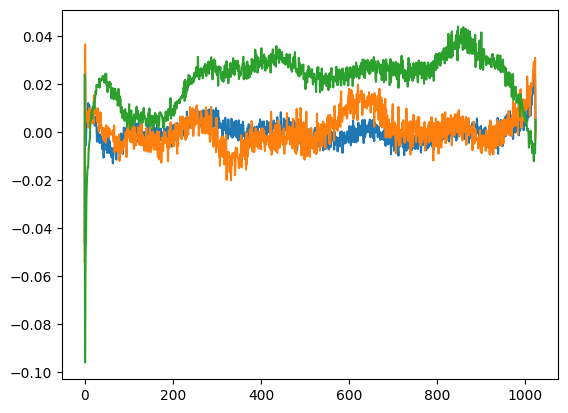

In [5]:
# What about for each token? What does it look like for each position?
# pick some columns
col1 = sd_hf["transformer.wpe.weight"][:, 150]
col2 = sd_hf["transformer.wpe.weight"][:, 200]
col3 = sd_hf["transformer.wpe.weight"][:, 250]

print(col1)
plt.plot(col1, label="Token 1")
plt.plot(col2, label="Token 2")
plt.plot(col3, label="Token 3")

In [6]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model="gpt2")
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, I'm writing a new language for you. But first, I'd like to tell you about the language itself"},
 {'generated_text': "Hello, I'm a language model, and I'm trying to be as expressive as possible. In order to be expressive, it is necessary to know"},
 {'generated_text': "Hello, I'm a language model, so I don't get much of a license anymore, but I'm probably more familiar with other languages on that"},
 {'generated_text': "Hello, I'm a language model, a functional model... It's not me, it's me!\n\nI won't bore you with how"},
 {'generated_text': "Hello, I'm a language model, not an object model.\n\nIn a nutshell, I need to give language model a set of properties that"}]

In [ ]:
#!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt


--2024-12-14 15:15:17--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-12-14 15:15:18 (22.3 MB/s) - ‘input.txt’ saved [1115394/1115394]

